<a href="https://colab.research.google.com/github/orodriguezq/orodriguezq-Senales_Y_Sistemas/blob/main/Parcial_1_SyS_2025-1/Parcial_1_SyS_2025_1__Omar_Andres_Rodriguez_Quiceno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO 1

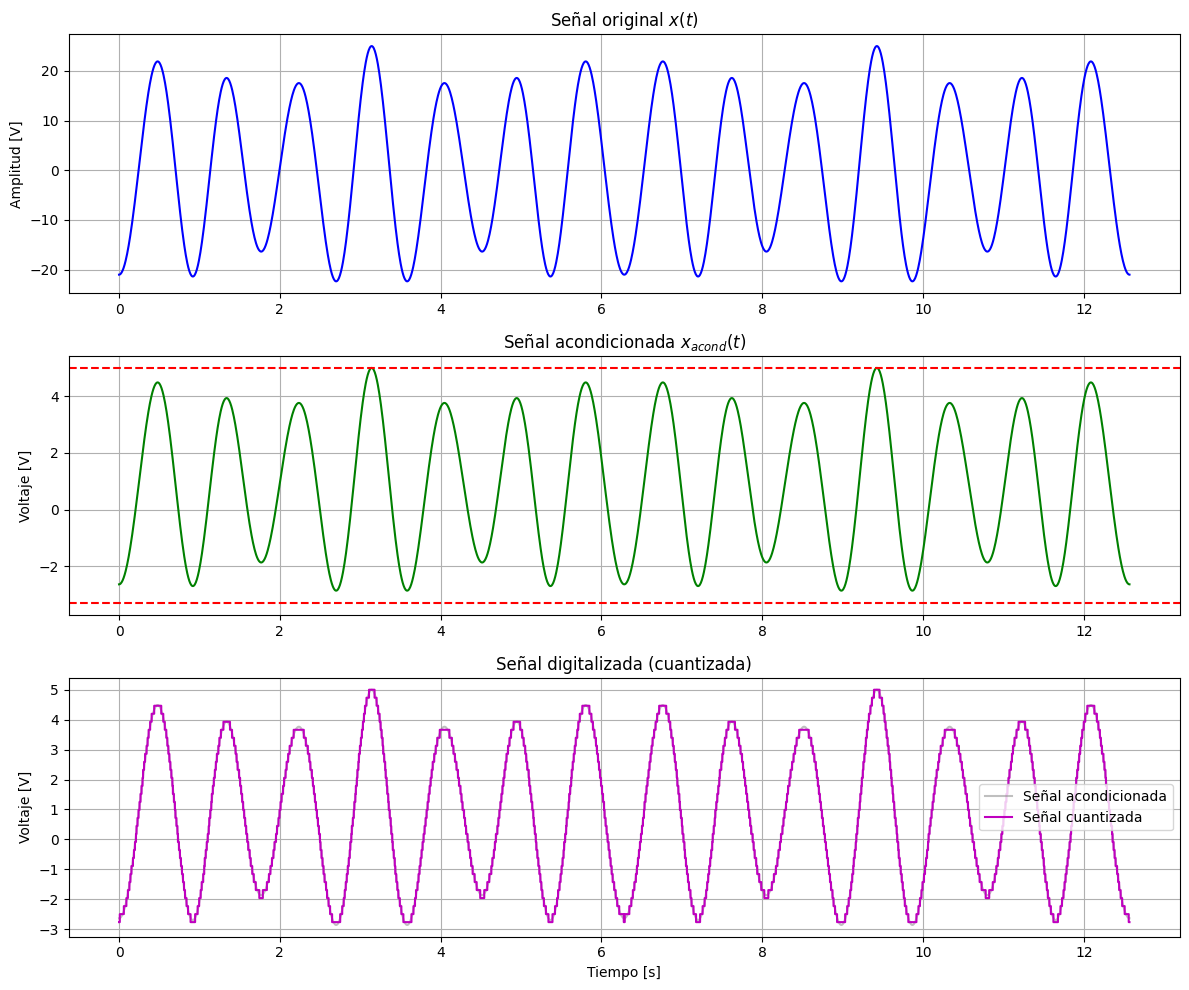

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# 1. Par√°metros del sistema
# ------------------------------

# Resoluci√≥n del ADC
bits = 5
niveles_adc = 2**bits  # 32 niveles

# Rango del ADC
v_min = -3.3
v_max = 5.0
rango_adc = v_max - v_min

# Paso de cuantizaci√≥n
delta = rango_adc / (niveles_adc - 1)

# Acondicionamiento lineal (calculado antes)
a = 0.166  # Ganancia
b = 0.85   # Offset

# ------------------------------
# 2. Definici√≥n de la se√±al original
# ------------------------------

# Per√≠odo fundamental: T = 2œÄ (como se demostr√≥)
T = 2 * np.pi
t = np.linspace(0, 2*T, 2000)  # Dos per√≠odos, buena resoluci√≥n temporal

# Se√±al original
x = 20 * np.sin(7*t - np.pi/2) - 3 * np.cos(5*t) + 2 * np.cos(10*t)

# ------------------------------
# 3. Acondicionamiento de se√±al
# ------------------------------

x_acond = a * x + b

# ------------------------------
# 4. Cuantizaci√≥n
# ------------------------------

# Cuantizaci√≥n uniforme mid-tread
x_q = np.round((x_acond - v_min) / delta) * delta + v_min

# ------------------------------
# 5. Gr√°ficas
# ------------------------------

plt.figure(figsize=(12, 10))

# Se√±al original
plt.subplot(3, 1, 1)
plt.plot(t, x, 'b')
plt.title("Se√±al original $x(t)$")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Se√±al acondicionada
plt.subplot(3, 1, 2)
plt.plot(t, x_acond, 'g')
plt.title("Se√±al acondicionada $x_{acond}(t)$")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.axhline(y=v_min, color='r', linestyle='--', label='Rango ADC')
plt.axhline(y=v_max, color='r', linestyle='--')

# Se√±al cuantizada
plt.subplot(3, 1, 3)
plt.plot(t, x_acond, color='gray', alpha=0.5, label='Se√±al acondicionada')
plt.step(t, x_q, where='mid', color='m', label='Se√±al cuantizada')
plt.title("Se√±al digitalizada (cuantizada)")
plt.ylabel("Voltaje [V]")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Conclusion:Se digitaliz√≥ una se√±al peri√≥dica adapt√°ndola al rango de un ADC de 5 bits (
[
‚àí
3.3
¬†V
,
5.0
¬†V
]
[‚àí3.3¬†V,5.0¬†V]) mediante un acondicionamiento lineal y cuantizaci√≥n uniforme. El proceso asegur√≥ una correcta representaci√≥n digital sin p√©rdida significativa de informaci√≥n.

PUNTO 2

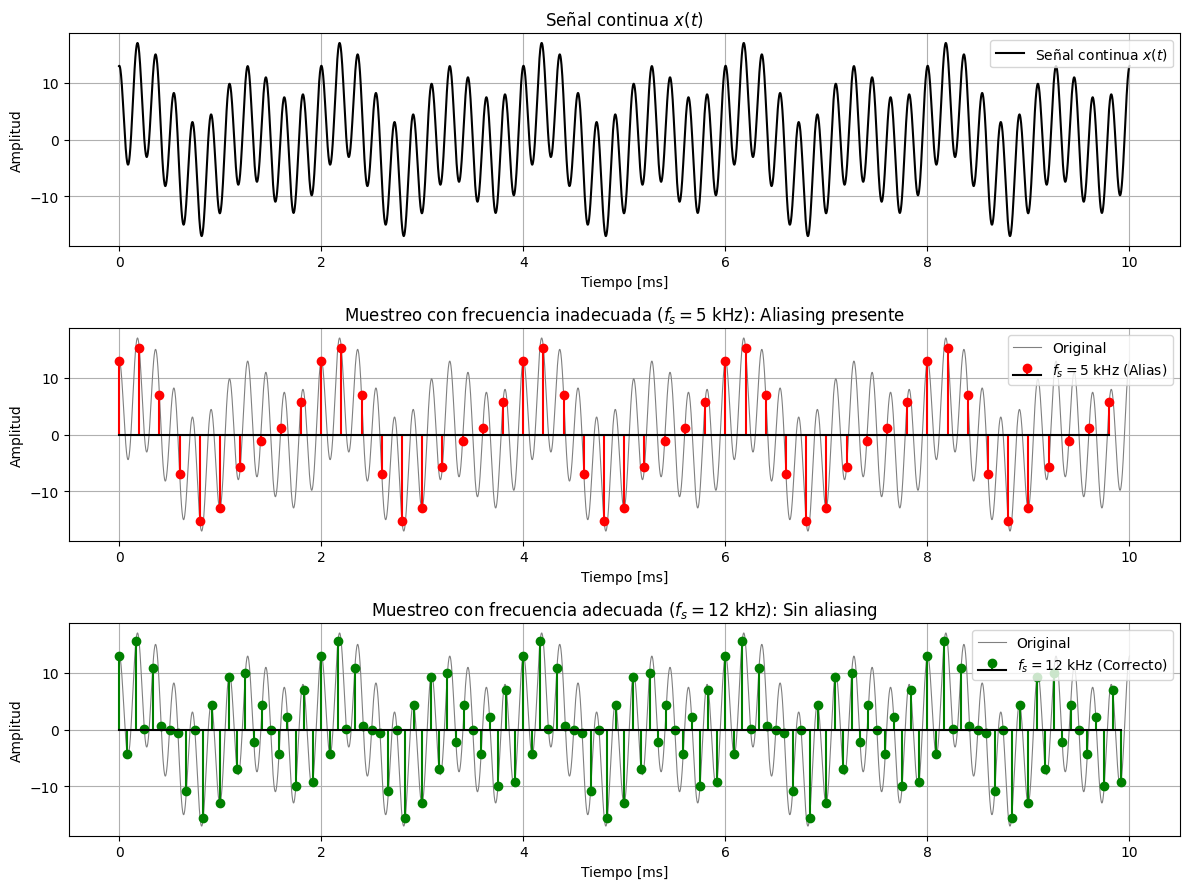

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Par√°metros de la se√±al
# -------------------------------

# Frecuencias en Hz
f1 = 500
f2 = 1000
f3 = 5500

# Amplitudes
A1 = 3
A2 = 5
A3 = 10

# Frecuencias de muestreo
fs_inadecuada = 5000   # No cumple Nyquist (aliasing)
fs_adecuada = 12000    # S√≠ cumple Nyquist

# Duraci√≥n de la simulaci√≥n (10 ms para ver aliasing mejor)
t_max = 0.01  # 10 ms

# -------------------------------
# 2. Tiempo continuo y se√±al original
# -------------------------------

t_cont = np.linspace(0, t_max, 5000)
x_t = A1 * np.cos(2 * np.pi * f1 * t_cont) + \
      A2 * np.sin(2 * np.pi * f2 * t_cont) + \
      A3 * np.cos(2 * np.pi * f3 * t_cont)

# -------------------------------
# 3. Muestreo con fs inadecuada (aliasing)
# -------------------------------

n_inadecuado = np.arange(0, t_max, 1/fs_inadecuada)
x_n_inadecuado = A1 * np.cos(2 * np.pi * f1 * n_inadecuado) + \
                 A2 * np.sin(2 * np.pi * f2 * n_inadecuado) + \
                 A3 * np.cos(2 * np.pi * f3 * n_inadecuado)

# -------------------------------
# 4. Muestreo con fs adecuada (sin aliasing)
# -------------------------------

n_adecuado = np.arange(0, t_max, 1/fs_adecuada)
x_n_adecuado = A1 * np.cos(2 * np.pi * f1 * n_adecuado) + \
               A2 * np.sin(2 * np.pi * f2 * n_adecuado) + \
               A3 * np.cos(2 * np.pi * f3 * n_adecuado)

# -------------------------------
# 5. Gr√°ficas
# -------------------------------

plt.figure(figsize=(12, 9))

# Se√±al continua
plt.subplot(3, 1, 1)
plt.plot(t_cont * 1000, x_t, 'k', label='Se√±al continua $x(t)$')
plt.title('Se√±al continua $x(t)$', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Se√±al muestreada con frecuencia INADECUADA (aliasing)
plt.subplot(3, 1, 2)
plt.plot(t_cont * 1000, x_t, 'gray', linewidth=0.8, label='Original')
plt.stem(n_inadecuado * 1000, x_n_inadecuado, linefmt='r-', markerfmt='ro', basefmt='k-', label='$f_s=5$ kHz (Alias)')
plt.title('Muestreo con frecuencia inadecuada ($f_s=5$ kHz): Aliasing presente', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

# Se√±al muestreada con frecuencia ADECUADA (sin aliasing)
plt.subplot(3, 1, 3)
plt.plot(t_cont * 1000, x_t, 'gray', linewidth=0.8, label='Original')
plt.stem(n_adecuado * 1000, x_n_adecuado, linefmt='g-', markerfmt='go', basefmt='k-', label='$f_s=12$ kHz (Correcto)')
plt.title('Muestreo con frecuencia adecuada ($f_s=12$ kHz): Sin aliasing', fontsize=12)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Conclusion:Al muestrear una se√±al continua compuesta por m√∫ltiples frecuencias, es fundamental que la frecuencia de muestreo cumpla con el teorema de Nyquist, es decir, debe ser mayor al doble de la frecuencia m√°s alta presente en la se√±al. En este ejercicio, cuando se utiliz√≥ una frecuencia de muestreo inadecuada (5‚ÄØkHz), apareci√≥ aliasing, que distorsion√≥ la se√±al al hacer que componentes de alta frecuencia se reflejen como frecuencias m√°s bajas. En cambio, al usar una frecuencia adecuada (12‚ÄØkHz), la se√±al fue muestreada correctamente, conservando su forma y contenido espectral.

PUNTO 3

In [10]:
import sympy as sp

# Declaramos las variables simb√≥licas
t, T, A = sp.symbols('t T A', real=True, positive=True)
pi = sp.pi

# Frecuencia angular
w0 = 2 * pi / T

# Definimos x1(t) = A cos(w0 t)
x1 = A * sp.cos(w0 * t)

# Definimos x2(t) como funci√≥n por tramos
x2 = sp.Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t < T))
)

# Diferencia al cuadrado entre se√±ales
diff_sq = sp.simplify((x1 - x2)**2)

# Definimos la distancia media como la integral del error cuadr√°tico medio
# Partimos la integral en tres tramos
int1 = sp.integrate(diff_sq, (t, 0, T/4))
int2 = sp.integrate(diff_sq, (t, T/4, 3*T/4))
int3 = sp.integrate(diff_sq, (t, 3*T/4, T))

# Sumamos los tramos y dividimos por T
d = (int1 + int2 + int3) / T

# Simplificamos la expresi√≥n
d_simplified = sp.simplify(d)

# Mostramos el resultado final
sp.pprint(d_simplified, use_unicode=True)


 2          
A    4‚ãÖA    
‚îÄ‚îÄ - ‚îÄ‚îÄ‚îÄ + 1
2     œÄ     


Conclusion:En este ejercicio calculamos la distancia media entre dos se√±ales peri√≥dicas
ùë•
1
(
ùë°
)
=
ùê¥
cos
‚Å°
(
2
ùúã
ùëá
ùë°
)
x
1
‚Äã
 (t)=Acos(
T
2œÄ
‚Äã
 t) y una se√±al por tramos
ùë•
2
(
ùë°
)
x
2
‚Äã
 (t). Utilizamos la f√≥rmula basada en la potencia media del error cuadr√°tico entre ambas se√±ales.

Tras resolver la integral a mano y confirmar con SymPy, obtuvimos que la distancia media es:

ùëë
(
ùë•
1
,
ùë•
2
)
=
ùê¥
2
2
‚àí
4
ùê¥
ùúã
+
1
d(x
1
‚Äã
 ,x
2
‚Äã
 )=
2
A
2

‚Äã
 ‚àí
œÄ
4A
‚Äã
 +1
Este valor cuantifica qu√© tan diferentes son ambas se√±ales en promedio durante un periodo
ùëá
T, considerando la forma de onda y sus discrepancias.

PUNTO 4

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")  # Oculta algunos warnings por derivadas num√©ricas

# -----------------------------
# Par√°metros de la se√±al x(t)
# -----------------------------
T = 10          # Periodo de la se√±al
A = 2           # Amplitud del valor constante
d1 = 1          # Punto de inicio del escal√≥n descendente
d2 = 3          # Punto de fin del escal√≥n
w0 = 2 * np.pi / T  # Frecuencia angular fundamental

# -----------------------------
# Eje de tiempo para simular una semiperiodo [-T/2, T/2]
# -----------------------------
num_points = 2000
t = np.linspace(-T/2, T/2, num_points)
dt = t[1] - t[0]  # Paso temporal para derivaci√≥n num√©rica

# -----------------------------
# Construcci√≥n de la se√±al x(t) definida por tramos
# -----------------------------
x = np.zeros_like(t)
for i in range(num_points):
    if -T/2 <= t[i] < -d2:
        x[i] = 0
    elif -d2 <= t[i] <= -d1:
        x[i] = (-A / (d2 - d1)) * (t[i] + d2)
    elif -d1 < t[i] < d1:
        x[i] = -A
    elif d1 <= t[i] <= d2:
        x[i] = (A / (d2 - d1)) * (t[i] - d2)
    elif d2 < t[i] <= T/2:
        x[i] = 0

# -----------------------------
# Segunda derivada de x(t) con diferencias finitas
# -----------------------------
x2p = np.gradient(np.gradient(x, dt), dt)

# -----------------------------
# Funci√≥n para calcular y graficar la reconstrucci√≥n y el espectro
# -----------------------------
def pltest(Na):
    """
    Calcula la reconstrucci√≥n de la se√±al x(t) a partir de la segunda derivada
    usando N arm√≥nicos, y muestra sus espectros.

    Par√°metro:
    Na -- N√∫mero de arm√≥nicos utilizados para reconstrucci√≥n
    """
    # Inicializa coeficientes an y bn
    an = np.zeros(Na + 1)
    bn = np.zeros(Na + 1)

    # C√°lculo de coeficientes an y bn a partir de la segunda derivada de x(t)
    for n in range(1, Na + 1):
        an[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.cos(n * w0 * t), t)
        bn[n] = -2 / (T * (n * w0)**2) * np.trapz(x2p * np.sin(n * w0 * t), t)

    # Coeficiente a0 calculado directamente desde x(t)
    a0 = (2 / T) * np.trapz(x, t)

    # Reconstrucci√≥n de la se√±al x(t) a partir de los coeficientes
    x_recon = np.full_like(t, a0 / 2)
    for n in range(1, Na + 1):
        x_recon += an[n] * np.cos(n * w0 * t) + bn[n] * np.sin(n * w0 * t)

    # Error relativo de la reconstrucci√≥n
    error_rel = np.linalg.norm(x - x_recon) / np.linalg.norm(x)
    print(f"Error relativo de reconstrucci√≥n (n=¬±{Na}): {error_rel:.6f}")

    # -----------------------------
    # C√°lculo de espectros
    # -----------------------------
    n_vals = np.arange(0, Na + 1)
    magnitudes = np.sqrt(an**2 + bn**2)
    fases = np.arctan2(-bn, an)  # Fase: arctan(-bn/an)
    parte_real = an
    parte_imaginaria = -bn

    # -----------------------------
    # Gr√°fica: Se√±al original vs reconstrucci√≥n
    # -----------------------------
    plt.figure(figsize=(10, 4))
    plt.plot(t, x, label='x(t)', color='orange')
    plt.plot(t, x_recon, '--', label='Reconstrucci√≥n', color='blue')
    plt.title(f"Reconstrucci√≥n de x(t) con N = {Na}")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # -----------------------------
    # Gr√°ficas del espectro (4 subplots)
    # -----------------------------
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].stem(n_vals, magnitudes, basefmt=" ")
    axs[0, 0].set_title("Magnitud")
    axs[0, 0].set_xlabel("n")
    axs[0, 0].set_ylabel("|C‚Çô|")

    axs[0, 1].stem(n_vals, fases, basefmt=" ")
    axs[0, 1].set_title("Fase")
    axs[0, 1].set_xlabel("n")
    axs[0, 1].set_ylabel("Fase [rad]")

    axs[1, 0].stem(n_vals, parte_real, basefmt=" ")
    axs[1, 0].set_title("Parte Real")
    axs[1, 0].set_xlabel("n")
    axs[1, 0].set_ylabel("Re{C‚Çô}")

    axs[1, 1].stem(n_vals, parte_imaginaria, basefmt=" ")
    axs[1, 1].set_title("Parte Imaginaria")
    axs[1, 1].set_xlabel("n")
    axs[1, 1].set_ylabel("Im{C‚Çô}")

    for ax in axs.flat:
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# -----------------------------
# Interfaz interactiva para variar el n√∫mero de arm√≥nicos
# -----------------------------
interact(pltest, Na=(0, 5, 1))


interactive(children=(IntSlider(value=2, description='Na', max=5), Output()), _dom_classes=('widget-interact',‚Ä¶

<function __main__.pltest(Na)>

Conclusion:En este ejercicio se analiz√≥ una se√±al peri√≥dica definida por tramos, calculando su espectro de Fourier a partir de la segunda derivada. Se implement√≥ una reconstrucci√≥n num√©rica utilizando una cantidad finita de arm√≥nicos. Se observ√≥ que, a medida que se incrementa el n√∫mero de arm√≥nicos, la reconstrucci√≥n se aproxima cada vez mejor a la se√±al original, lo que demuestra la eficacia del an√°lisis de Fourier para representar se√±ales complejas mediante sumas de senos y cosenos. Adem√°s, se visualiz√≥ claramente c√≥mo los coeficientes espectrales determinan las caracter√≠sticas clave de la se√±al en frecuencia.